# Clustering

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel('cars.xlsx')
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
x=df[['Price','Mileage','Cylinder']]

In [6]:
model=KMeans(4)

In [11]:
model=model.fit(x)

In [16]:
pred=model.predict(x)

AttributeError: 'NoneType' object has no attribute 'split'

In [13]:
pred

NameError: name 'pred' is not defined

In [14]:
silhouette_score(x,pred)

NameError: name 'pred' is not defined

In [15]:
x['Cluster']=pred
x.sample(5)

NameError: name 'pred' is not defined

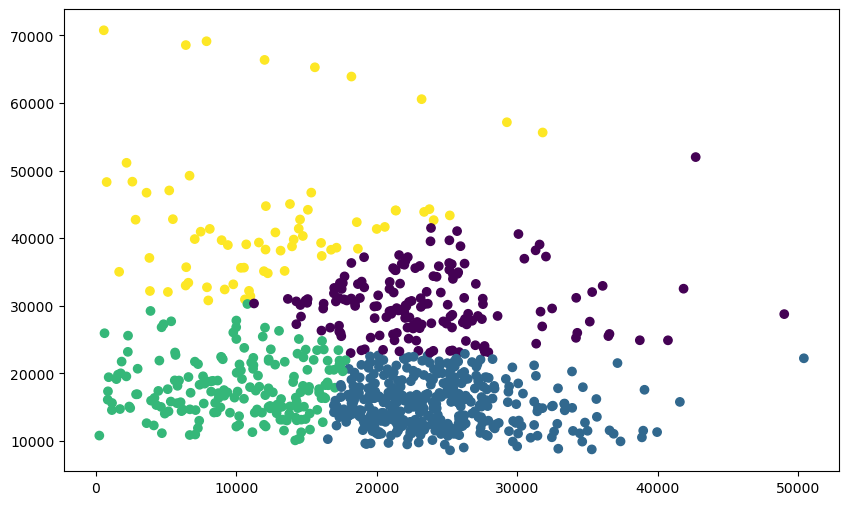

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price, c=pred)

In [12]:
#Elbow Method

In [13]:
allscore=[]
allcluster=[]
distances=[]
def clust(nclusters):
    for i in range (1,nclusters):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred)
        distance=model.inertia_
        print("Cluster ",i," score: ",score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [14]:
clust(10)

Cluster  2  score:  0.451701189440635
Cluster  3  score:  0.413210863774713
Cluster  4  score:  0.4101003748084372
Cluster  5  score:  0.3552183407709913
Cluster  6  score:  0.3709737609647593
Cluster  7  score:  0.3615616454287336
Cluster  8  score:  0.3664426046528396
Cluster  9  score:  0.35110678892666913
Cluster  10  score:  0.3577015467261893


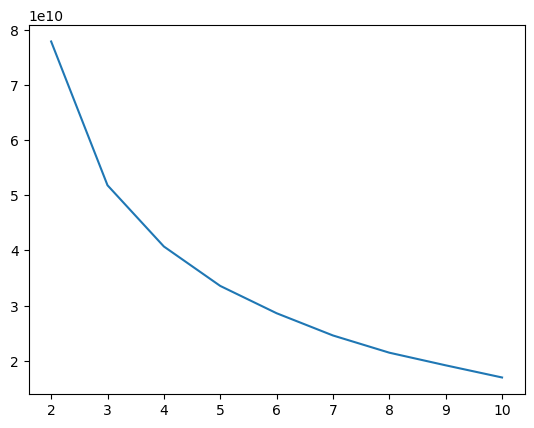

In [15]:
plt.plot(allcluster, distances)

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [17]:
data=linkage(x, method='ward',metric='euclidean')

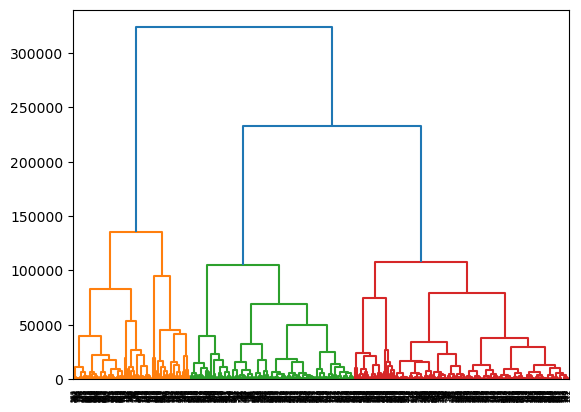

In [18]:
dendrogram(data)
plt.show()

In [19]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [20]:
from yellowbrick.cluster import KElbowVisualizer

In [21]:
model=KMeans()

In [22]:
visualizer=KElbowVisualizer(model, k=(1,10))

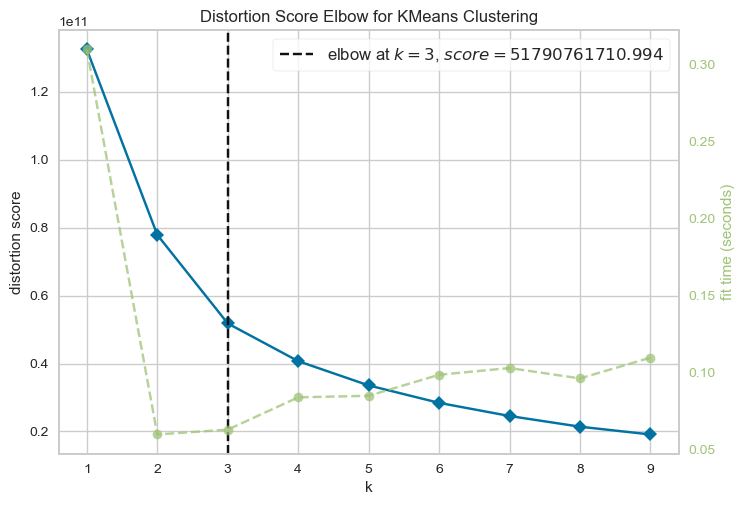

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
visualizer.fit(x)
visualizer.show()

In [24]:
#PCA-Principle Component Analysis-Dimension Reduction

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca=PCA(2)

In [27]:
x_r=pca.fit_transform(x)

In [28]:
x_r

array([[  -114.45337995, -12289.5833497 ],
       [  -190.01019202, -11350.62616437],
       [ -2739.58305978,  -7923.93297892],
       ...,
       [ -5526.79956895,  -1172.32319089],
       [ -7860.03951074,   3840.24637599],
       [-12402.20948396,  12528.17223995]])

In [29]:
pca.explained_variance_ratio_

array([0.61623821, 0.38376178])

In [30]:
sum(pca.explained_variance_ratio_)

0.999999989370298

In [32]:
# plt.scatter(x_r[0],x_r[1],c=pred)